```{contents}

```

## Spearman’s Rank Correlation Coefficient (ρ or *rₛ*)

Spearman’s rank correlation measures the **strength** and **direction** of a **monotonic relationship** (increasing or decreasing) between two variables.

* Unlike Pearson’s, it does **not assume linearity**.
* It works by converting data into **ranks** and then computing correlation on the ranks.

### Formula

For $n$ observations,

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

Where:

* $d_i = R(x_i) - R(y_i)$ = difference between the ranks of $x_i$ and $y_i$
* $R(x_i), R(y_i)$ = rank of each observation
* $n$ = number of observations

If there are **tied ranks**, the formula uses Pearson correlation on ranks instead.

---

### Range

$$
-1 \leq \rho \leq +1
$$

* **+1** → Perfect monotonic increasing relationship (as X ↑, Y ↑).
* **-1** → Perfect monotonic decreasing relationship (as X ↑, Y ↓).
* **0** → No monotonic association.

---

### When to Use

* Data is **ordinal** (ranked) instead of interval/ratio.
* Relationship is **monotonic but not linear**.
* **Non-parametric test** → doesn’t assume normality.

---

### Example

| Student | Math Score (X) | Science Score (Y) |
| ------- | -------------- | ----------------- |
| A       | 90             | 85                |
| B       | 70             | 65                |
| C       | 80             | 75                |
| D       | 60             | 60                |
| E       | 50             | 55                |

Step 1: Rank both X and Y.
Step 2: Compute rank differences $d_i$.
Step 3: Plug into formula.

Result → ρ ≈ **+1**, meaning strong positive monotonic relationship.

---

### Pearson vs Spearman

| Feature      | Pearson (r)                 | Spearman (ρ)           |
| ------------ | --------------------------- | ---------------------- |
| Type of data | Interval/ratio              | Ordinal or continuous  |
| Measures     | Linear relationship         | Monotonic relationship |
| Sensitivity  | Sensitive to outliers       | Less sensitive         |
| Assumptions  | Normality, homoscedasticity | None (non-parametric)  |

---

**In short**:
Spearman’s coefficient is best when the relationship is **monotonic** (always increasing/decreasing), when data is **ordinal**, or when Pearson’s assumptions are violated.



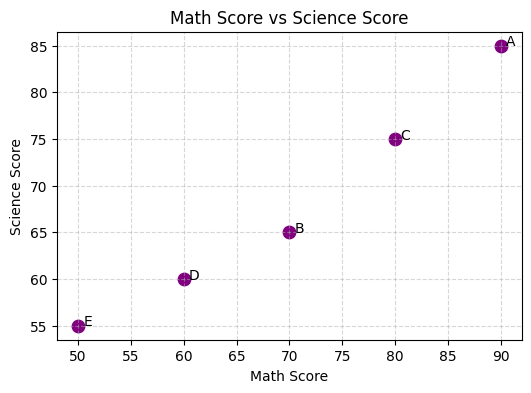

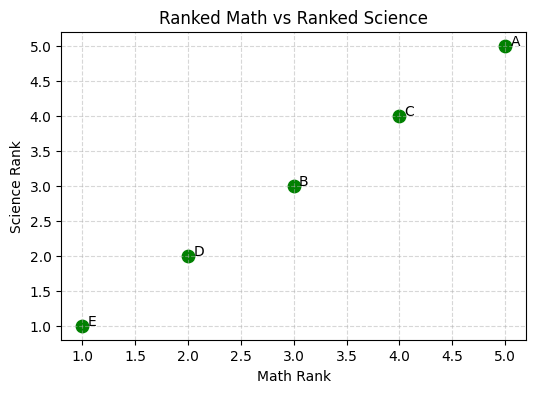

Spearman's rank correlation coefficient: 1.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, rankdata

# Example data from the table
students = ['A', 'B', 'C', 'D', 'E']
math = np.array([90, 70, 80, 60, 50])
science = np.array([85, 65, 75, 60, 55])

# Calculate ranks
math_ranks = rankdata(math, method='average')
science_ranks = rankdata(science, method='average')

# Scatter plot of original scores
plt.figure(figsize=(6,4))
plt.scatter(math, science, color='purple', s=80)
for i, name in enumerate(students):
    plt.text(math[i]+0.5, science[i], name)
plt.title('Math Score vs Science Score')
plt.xlabel('Math Score')
plt.ylabel('Science Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Scatter plot of ranks
plt.figure(figsize=(6,4))
plt.scatter(math_ranks, science_ranks, color='green', s=80)
for i, name in enumerate(students):
    plt.text(math_ranks[i]+0.05, science_ranks[i], name)
plt.title('Ranked Math vs Ranked Science')
plt.xlabel('Math Rank')
plt.ylabel('Science Rank')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Calculate Spearman's rank correlation
rho, _ = spearmanr(math, science)
print(f"Spearman's rank correlation coefficient: {rho:.2f}")